In [ ]:
#order blast by sseqid start
import pandas as pd
blast_file = 'extras/data/tracker/blast_90_90.csv'
blast_file_orderer = 'extras/data/tracker/blast_90_90.order.csv'
df_blast = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blast.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blast = df_blast.sort_values(['sseqid', 'sstart'])
df_blast.to_csv(blast_file_orderer, sep="\t", index=None)
df_blast.head()


In [5]:
#order blast by sseqid start
import pandas as pd
blast_file = 'extras/data/iwgsc_cn4/blast_95.csv'
blast_file_orderer = 'extras/data/iwgsc_cn4/blast_95_95.order.csv'
df_blast = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blast.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blast = df_blast.sort_values(['sseqid', 'sstart'])
df_blast.to_csv(blast_file_orderer, sep="\t", index=None)
df_blast.head()

qseqid sseqid  pident  \
820    MITE_T_11550|chr4B|491446578|491446917|ATTC|34...  chr1A   95.17   
2934   MITE_T_45970|chr3B|651188527|651188767|AT|42|F...  chr1A   97.08   
2963   MITE_T_45970|chr3B|651188527|651188767|AT|42|F...  chr1A   96.67   
2988   MITE_T_45970|chr3B|651188527|651188767|AT|42|F...  chr1A   96.25   
14809  MITE_T_100638|chr4A|274958954|274959060|ACT|25...  chr1A   95.28   

       length  mismatch  gapopen  qstart  qend  sstart    send         evalue  \
820       331        16        0       7   337  442471  442801  8.000000e-148   
2934      240         6        1       1   240  674129  674367  2.000000e-109   
2963      240         7        1       1   240  676678  676916  2.000000e-108   
2988      240         8        1       1   240  679227  679465  1.000000e-106   
14809     106         5        0       1   106  712631  712526   6.000000e-41   

       bitscore  
820       526.0  
2934      398.0  
2963      394.0  
2988      389.0  
14809     168.0

Most common MITEs in wheat / TREP

In [1]:
#

Distance from MITEs to genes

In [ ]:
gene_file = '../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3'
blat_file = 'extras/data/iwgsc_cn4/blat_95_95_new.csv'
blast_file = 'extras/data/iwgsc_cn4/blast_95.csv'
genome_file = 'extras/data/iwgsc.gff3'

#for rice data
#genome_file = 'extras/data/rice.gff3.csv'
#blat_file = 'extras/data/tracker/blat_90_90.csv'
#gene_file = '../data/IRGSP-1.0_representative/locus.gff'

In [3]:
#load MITEs
import pandas as pd
import sys
df_blat = pd.read_csv(blat_file, index_col=False, sep='\t')
df_blat = df_blat[df_blat.tName != 'chrUn'].reset_index(drop=True)

In [5]:
#load MITEs in blast
import pandas as pd
import sys
df_blat = pd.read_csv(blast_file, index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
df_blat = df_blat[df_blat.sseqid != 'chrUn'].reset_index(drop=True)

In [ ]:
#load genes
df_genes = pd.read_csv(gene_file, index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

In [8]:
#load genome structure
df_genome = pd.read_csv(genome_file, index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes_genome = {}
for k,chromosome in df_genome.iterrows():
    df_genes_genome[chromosome.seqname] = df_genes[(df_genes.seqname == chromosome.seqname)].reset_index()

In [10]:
#calculate distance to closest gene
distances = []
print(len(df_blat.index))
for k,v in df_blat.iterrows():
    midd = (v.sstart + v.send) / 2
    df_curr = df_genes_genome[v.sseqid]
    df_res = df_curr.loc[(df_curr.start - midd).abs().argsort()[:1]]
    if len(df_res.index) > 0:
        closest = (int(df_res.start) + int(df_res.end)) / 2
        distance = abs(midd - closest)
        distances.append(distance)
    else:
        print(v.qseqid, midd)
        print(df_res)
        print(df_curr)
        print('error')

682396


In [11]:
#calculate distance max and min
print(min(distances))
print(max(distances))
distances_kb = []
for d in distances:
    distances_kb.append(d/1000)

0.0
3631676.5


In [16]:
#! pip3 install seaborn
distances_kb_filtered = []
for distance_kb in distances_kb:
    if distance_kb <= 500:
        distances_kb_filtered.append(distance_kb)

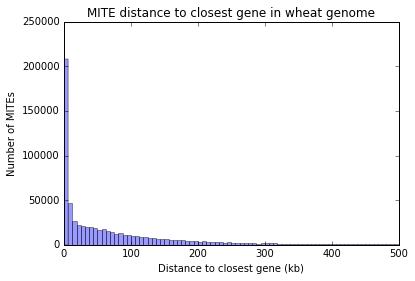

In [17]:
%matplotlib inline

# PLOT
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn histogram
sns.distplot(distances_kb_filtered, hist=True, kde=False, 
             bins=80, color = 'blue',
             hist_kws={'edgecolor':'black'},rug=False)
# Add labels
plt.title('MITE distance to closest gene in wheat genome')
plt.xlabel('Distance to closest gene (kb)')
plt.ylabel('Number of MITEs')
plt.savefig('extras/histogram.png', dpi=800,bbox_inches='tight')




Count Families

In [2]:
#count families 
import pandas as pd
import sys
df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_90_90.order.csv', index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df_trep = pd.read_csv('extras/data/iwgsc_cn4/trep.csv', index_col=False, sep='\t')
df_trep.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

In [3]:
#order by count
s = df_blat.qseqid.value_counts()

In [7]:
#search trep 
count = 1
results = []
for k in s.index.tolist():
#    df_blat[df_blat.qName == k].sort_values(by=['tName','tStart']).to_csv(str(count) + '.csv')
    count += 1
    trep = df_trep[df_trep.qseqid == k].reset_index(drop=True)
    trep_res = ""
    if len(trep.index) > 0:
        trep_res = trep.iloc[0].sseqid
        results.append((s[k],trep_res.split('_')[2]))
    else:
        results.append((s[k],'other'))
        print(k,s[k])

MITE_T_107873|chr6A|1090278|1090371|TA|94|F4870 9948
MITE_T_61402|chr4D|238640163|238640349|TT|22|F2412 7818
MITE_T_110571|chr2D|607678032|607678122|TA|96|F5026 7723
MITE_T_109028|chr4A|536887987|536888079|AT|97|F4956 6467
MITE_T_110551|chr4D|389092137|389092227|TA|95|F5025 5920
MITE_T_105766|chr2D|53145720|53145816|TT|97|F4748 5720
MITE_T_115150|chr5B|212481103|212481188|AG|85|F5237 5714
MITE_T_113343|chr2B|179285004|179285091|GA|87|F5153 5623
MITE_T_106360|chr7D|382748178|382748273|TAA|92|F4793 5579
MITE_T_127300|chr3A|443850571|443851119|TA|13|F5947 5170
MITE_T_104908|chr7B|439502556|439502653|GT|98|F4693 4875
MITE_T_117911|chr3B|698612860|698612942|TA|86|F5390 4836
MITE_T_107353|chr1D|415405053|415405147|TA|101|F4845 4558
MITE_T_117900|chr6A|369574554|369574636|TA|86|F5389 4397
MITE_T_116685|chr5D|244254210|244254293|ACT|88|F5319 4201
MITE_T_118125|chr2A|762155266|762155348|TA|86|F5402 4060
MITE_T_117895|chr1B|442205233|442205315|TA|87|F5388 3698
MITE_T_80802|chr4D|492804265|492804

MITE_T_78633|chr1B|664317008|664317159|TA|45|F3378 734
MITE_T_60173|chr7B|568480088|568480278|CTCCAC|26|F2364 729
MITE_T_78851|chr4B|27523609|27523760|TA|40|F3391 728
MITE_T_55100|chr5A|401306692|401306907|TA|221|F2173 726
MITE_T_35813|chr6B|500895919|500896187|AT|46|F1479 726
MITE_T_78759|chr6B|19238249|19238400|TA|45|F3386 725
MITE_T_60125|chr2B|172996541|172996731|TTGCAA|30|F2358 724
MITE_T_78450|chr7B|123749662|123749813|TA|44|F3372 723
MITE_T_3404|chr5A|188888150|188888560|TA|63|F225 722
MITE_T_49406|chr7A|151325171|151325410|TA|27|F1932 717
MITE_T_78817|chr4B|23847377|23847528|TA|45|F3389 714
MITE_T_78941|chr1D|465526846|465526997|TA|41|F3395 713
MITE_T_78702|chr6A|15628952|15629103|TA|45|F3383 712
MITE_T_53358|chr2B|679054799|679055022|AACATAC|225|F2095 711
MITE_T_30787|chr1B|627876675|627876953|GC|50|F1233 708
MITE_T_78697|chr3A|466154761|466154912|TA|43|F3382 707
MITE_T_61104|chr3A|613365571|613365759|GTCAGATG|22|F2399 707
MITE_T_77972|chr5B|622603714|622603869|CC|44|F3333 704

MITE_T_19828|chr6A|522224651|522224963|AT|34|F823 424
MITE_T_23494|chr5A|549405165|549405464|TA|33|F970 422
MITE_T_62409|chr5A|471707088|471707270|TCA|18|F2481 418
MITE_T_14837|chr4B|600483433|600483762|CTAGTACTAG|21|F676 418
MITE_T_78240|chr5A|490309722|490309876|GC|38|F3348 416
MITE_T_22003|chr4A|590230223|590230528|TTA|15|F898 415
MITE_T_59029|chr5A|604911858|604912057|TA|28|F2272 414
MITE_T_73734|chr3A|9970160|9970322|TA|43|F3029 414
MITE_T_127010|chr7A|631285940|631286500|AT|14|F5927 413
MITE_T_2887|chr1A|201863364|201863784|AT|66|F192 412
MITE_T_5399|chr5D|63034941|63035328|GC|13|F327 411
MITE_T_56431|chr7B|200425390|200425599|GTC|35|F2205 410
MITE_T_35170|chr2B|226608789|226609060|AT|48|F1444 407
MITE_T_60157|chr2B|2836022|2836212|TGGTGG|23|F2362 407
MITE_T_25308|chr4B|601535219|601535515|TTA|22|F1009 405
MITE_T_53006|chr5D|446272064|446272290|TTAA|239|F2067 405
MITE_T_87573|chr5A|69844778|69844905|AT|122|F3760 403
MITE_T_127496|chr1A|377646296|377646841|TA|10|F5954 401
MITE_T_7

MITE_T_75738|chr4A|714331464|714331625|TA|45|F3152 226
MITE_T_127082|chr6B|639983490|639984045|GCTTTGATA|561|F5934 225
MITE_T_59992|chr7A|663045085|663045277|GAGT|27|F2344 224
MITE_T_60550|chr6B|179655896|179656085|TA|205|F2369 223
MITE_T_60581|chr1A|316643309|316643498|GTTGTGCT|23|F2372 222
MITE_T_22811|chr5D|182505059|182505360|TTA|15|F938 221
MITE_T_18439|chr2B|731194495|731194813|TTA|15|F765 221
MITE_T_27900|chr4A|618318910|618319659|GCGC|17|F1109 220
MITE_T_86668|chr3D|433565985|433566112|TT|129|F3732 220
MITE_T_122306|chr7B|143334811|143334880|AT|75|F5697 220
MITE_T_58060|chr5B|626195146|626195352|GA|208|F2223 220
MITE_T_122755|chr5A|200782960|200783017|AT|62|F5748 219
MITE_T_37954|chr3B|795814938|795815202|AA|276|F1567 217
MITE_T_39615|chr3A|146197975|146198235|TA|71|F1658 214
MITE_T_122319|chr1A|28705660|28705729|ATAT|71|F5699 213
MITE_T_88506|chr5B|440564451|440564576|TA|131|F3810 212
MITE_T_54364|chr5B|285934526|285934744|TA|223|F2131 211
MITE_T_28613|chr3A|612961398|61296168

MITE_T_25573|chr3A|488313629|488313924|TA|29|F1016 117
MITE_T_1096|chr5A|632649841|632650287|TA|68|F94 116
MITE_T_10989|chr4B|586766004|586766347|ATAA|34|F574 116
MITE_T_7160|chr5B|562199193|562199567|TA|13|F411 116
MITE_T_43425|chr7A|637299793|637300038|ACTT|244|F1846 115
MITE_T_43358|chr4B|36970242|36970487|TTTTT|245|F1842 112
MITE_T_50622|chr4A|456298952|456299189|TA|241|F1976 110
MITE_T_102922|chr5A|472310931|472311033|AT|103|F4578 110
MITE_T_49304|chr4A|669380076|669380316|AT|249|F1922 109
MITE_T_59735|chr1D|121242275|121242467|TAA|16|F2327 108
MITE_T_122424|chr7B|296330826|296330889|ACT|69|F5720 108
MITE_T_128023|chr1B|48775007|48775512|AT|38|F5998 108
MITE_T_7499|chr7A|38088429|38088799|CG|10|F425 108
MITE_T_118965|chr2B|793544884|793544965|TA|85|F5431 107
MITE_T_24819|chr2D|116593589|116593886|AT|309|F993 105
MITE_T_13778|chr2B|400560116|400560447|TA|10|F652 104
MITE_T_122243|chr5D|389438723|389438794|TA|76|F5687 104
MITE_T_30927|chr7A|463416600|463416878|GGC|48|F1241 103
MITE_

MITE_T_9070|chr7D|137950988|137951344|AG|15|F512 51
MITE_T_18434|chr1A|209583562|209583880|TC|39|F764 51
MITE_T_82651|chr1B|3239953|3240085|TA|23|F3575 51
MITE_T_99676|chr3B|584740772|584740881|TA|41|F4351 50
MITE_T_81786|chr2B|718602930|718603066|TGAT|140|F3528 50
MITE_T_3094|chr2D|612709949|612710366|TCT|422|F202 50
MITE_T_4591|chr1B|92883178|92883576|ACTACGGCG|81|F275 50
MITE_T_2056|chr5A|501847989|501848420|TA|35|F145 50
MITE_T_127865|chr5B|655375559|655376073|AT|27|F5988 50
MITE_T_53651|chr2B|330437298|330437518|TATTA|23|F2113 50
MITE_T_126212|chr2B|787569605|787570405|GTA|14|F5891 50
MITE_T_33764|chr1A|521672979|521673252|TA|284|F1360 50
MITE_T_27708|chr5B|630100157|630100444|TT|288|F1105 49
MITE_T_631|chr1A|468600527|468600987|TA|13|F54 49
MITE_T_122398|chr2D|334331512|334331576|TA|69|F5714 49
MITE_T_1763|chr7D|117216386|117216820|AT|434|F127 48
MITE_T_58982|chr5B|558456728|558456927|TTA|47|F2269 48
MITE_T_7294|chr7B|290709419|290710178|AGCT|11|F414 48
MITE_T_25628|chr3B|1541903

MITE_T_123752|chr4D|374780975|374781645|TATCATA|215|F5808 25
MITE_T_13555|chr4D|438105194|438105526|CC|37|F644 25
MITE_T_17979|chr5D|380185815|380186136|TTA|18|F739 25
MITE_T_116109|chr1D|201494984|201495068|AT|88|F5289 25
MITE_T_5975|chr5B|563165478|563165860|TA|63|F355 25
MITE_T_81031|chr5B|691008346|691008487|AACTT|25|F3476 24
MITE_T_15942|chr4A|455923537|455923865|TAGCTA|10|F683 24
MITE_T_2843|chr3B|250979450|250979871|TTT|427|F189 24
MITE_T_63333|chr3A|46566923|46567103|AT|24|F2533 24
MITE_T_62634|chr5B|34558164|34558345|GGATCC|28|F2509 24
MITE_T_35109|chr5B|545363466|545363737|TT|36|F1442 24
MITE_T_84212|chr1A|563800375|563800505|GGCC|15|F3621 23
MITE_T_6692|chr2D|571202367|571202744|AG|10|F386 23
MITE_T_24681|chr6B|52643207|52643505|TA|14|F984 23
MITE_T_24189|chr5A|419599761|419600059|GA|32|F979 23
MITE_T_91348|chr6B|415874161|415874283|TA|13|F3963 23
MITE_T_61089|chr2B|679053954|679054142|TAC|17|F2397 23
MITE_T_119642|chr1B|397429381|397429462|TA|85|F5448 23
MITE_T_125129|chr5B

MITE_T_1909|chr1B|561694221|561694654|TA|40|F137 15
MITE_T_121393|chr6B|503536324|503536405|TA|85|F5587 14
MITE_T_63396|chr5A|255491915|255492094|AT|38|F2538 14
MITE_T_2153|chr1A|399420041|399420470|GTGGGACCCT|439|F149 14
MITE_T_53320|chr6D|248582279|248583018|GAG|26|F2093 14
MITE_T_62195|chr7A|670351161|670351344|CTATGGAT|13|F2467 14
MITE_T_125600|chr3A|740092149|740092756|GC|35|F5870 14
MITE_T_60824|chr1D|48024398|48024587|ACACAA|17|F2381 14
MITE_T_61968|chr4A|730496825|730497009|TGCA|21|F2447 14
MITE_T_14311|chr5B|302342708|302343037|TA|35|F671 14
MITE_T_75082|chr1B|615414308|615414469|GGCC|21|F3098 14
MITE_T_50629|chr3A|308789505|308789742|GC|17|F1977 14
MITE_T_21423|chr5A|19489453|19489760|CAAATTTG|10|F870 14
MITE_T_59053|chr3B|697172340|697172538|TG|25|F2275 14
MITE_T_97033|chr2A|20794993|20795105|CG|13|F4280 14
MITE_T_34247|chr2A|229985701|229985974|TA|19|F1398 14
MITE_T_61930|chr7A|683981450|683981635|GT|17|F2443 14
MITE_T_7398|chr5D|439405461|439405834|AG|386|F417 14
MITE_T_75

MITE_T_17631|chr3D|571057299|571057623|GGCT|17|F722 10
MITE_T_79075|chr5B|271045650|271045800|AT|13|F3402 10
MITE_T_128441|chr5A|46248854|46249654|ACCGAAAG|19|F6013 10
MITE_T_67181|chr2A|26840158|26840328|CC|20|F2715 10
MITE_T_69109|chr2B|357913164|357913331|GTC|19|F2802 10
MITE_T_59256|chr5A|644023080|644023277|AA|24|F2290 10
MITE_T_50804|chr6B|717874876|717875113|GC|43|F1991 10
MITE_T_36316|chr4A|702169872|702170665|TATTGACAC|346|F1496 10
MITE_T_1330|chr1B|28520384|28520826|TAA|14|F102 10
MITE_T_127927|chr7A|158344005|158344778|CG|30|F5990 10
MITE_T_1814|chr7A|670858267|670858701|CTCGTAC|445|F131 10
MITE_T_80526|chr6D|18958673|18958818|ATAT|37|F3438 10
MITE_T_67173|chr2B|57732002|57732172|TA|43|F2713 10
MITE_T_2596|chr2B|665444281|665444705|ACGT|70|F168 10
MITE_T_66278|chr5B|477637017|477637188|TA|37|F2684 10
MITE_T_5683|chr3B|816618890|816619274|TA|35|F342 9
MITE_T_238|chr2B|51174964|51175442|TGCA|21|F23 9
MITE_T_49843|chr4A|425885577|425886319|CGTGGGCC|17|F1954 9
MITE_T_52635|chr7B

MITE_T_122174|chr2A|49850925|49850996|TA|75|F5679 7
MITE_T_123824|chr4B|637331804|637332471|AT|27|F5812 7
MITE_T_27696|chr7D|421801021|421801308|TAA|13|F1103 7
MITE_T_73717|chr7A|158373239|158373401|ATCTAC|15|F3027 7
MITE_T_127832|chr6A|453755920|453756436|AT|28|F5986 7
MITE_T_124342|chr1B|678238124|678238775|AGTTC|48|F5827 7
MITE_T_73779|chr2A|504252521|504252683|TATA|24|F3032 7
MITE_T_14041|chr7A|104030348|104031147|CAAAG|14|F662 7
MITE_T_84252|chr5B|396461144|396461274|TA|30|F3624 7
MITE_T_70|chr4B|5553363|5554134|CA|13|F11 7
MITE_T_39473|chr2D|371919146|371919406|TA|98|F1650 7
MITE_T_124271|chr5A|10925535|10926189|TGTATGTA|20|F5823 7
MITE_T_36091|chr3B|72474691|72474958|TT|278|F1489 7
MITE_T_1584|chr5B|502014879|502015316|GAC|46|F119 7
MITE_T_115796|chr2A|285632926|285633011|AC|85|F5264 7
MITE_T_41860|chr5A|631061410|631061664|GA|34|F1774 7
MITE_T_69822|chr7B|706187633|706187800|AT|37|F2847 7
MITE_T_7802|chr1B|7948015|7948383|TA|28|F445 7
MITE_T_102800|chr7A|628642550|628642653|TA|

MITE_T_244|chr4A|713410384|713410860|AT|11|F24 5
MITE_T_127543|chr7B|606618439|606618981|CCGGAA|16|F5958 5
MITE_T_126037|chr7B|265166783|265167375|AT|10|F5885 5
MITE_T_126917|chr5A|673765552|673766114|CTCTCCTC|12|F5923 5
MITE_T_417|chr3A|333269323|333269791|TAGCCCAAG|470|F41 5
MITE_T_31025|chr6A|569440156|569440433|AT|21|F1253 5
MITE_T_96210|chr2A|351171954|351172067|CG|35|F4217 5
MITE_T_126261|chr6A|258370089|258370676|TA|42|F5892 5
MITE_T_60111|chr7B|189557027|189557217|AAG|65|F2357 5
MITE_T_68683|chr7B|41200957|41201125|CA|34|F2777 5
MITE_T_5198|chr6B|99071890|99072279|TAA|14|F316 5
MITE_T_64189|chr5A|543965110|543965287|TCCATAAG|14|F2572 5
MITE_T_6722|chr2A|763824085|763824462|TTA|21|F387 5
MITE_T_43068|chr2B|594837037|594837283|TA|21|F1832 5
MITE_T_38450|chr1D|457223477|457223740|AATT|44|F1589 5
MITE_T_123715|chr1B|213245571|213246249|TTA|23|F5802 5
MITE_T_754|chr1B|457347514|457347969|TTGATACCC|19|F68 5
MITE_T_127069|chr5B|191007740|191008295|TA|19|F5933 5
MITE_T_4185|chr4A|62770

MITE_T_6287|chr4D|81454592|81454972|TAA|16|F373 3
MITE_T_8720|chr3A|58887896|58888256|GAT|21|F489 3
MITE_T_113008|chr1A|504258244|504258331|AGTATT|21|F5142 3
MITE_T_3837|chr2A|575652976|575653382|CCATATGG|432|F240 3
MITE_T_6830|chr3A|25813978|25814354|TA|24|F395 3
MITE_T_123966|chr5A|152093221|152094007|GC|10|F5817 3
MITE_T_21617|chr5B|591582026|591582333|AT|37|F878 3
MITE_T_127539|chr7A|180242821|180243363|TTA|18|F5957 3
MITE_T_80591|chr3A|142581470|142581614|CA|14|F3446 3
MITE_T_35246|chr7B|205370078|205370824|ACCGTACC|13|F1448 3
MITE_T_61078|chr2B|101781428|101781616|TAGC|16|F2396 3
MITE_T_9457|chr5D|537981754|537982103|TTA|10|F539 3
MITE_T_123740|chr4D|118430760|118431434|AT|20|F5806 3
MITE_T_126381|chr5B|477882391|477882970|TA|38|F5900 3
MITE_T_125283|chr4B|528897707|528898490|TGG|15|F5860 3
MITE_T_22222|chr3B|576344020|576344325|GTTTTCCT|28|F910 3
MITE_T_122463|chr5A|58530715|58531418|TTA|18|F5726 3
MITE_T_9009|chr1B|276058601|276058958|TA|10|F508 3
MITE_T_100968|chr6B|402210929|

MITE_T_125273|chr7B|607328204|607328821|TGAG|626|F5859 2
MITE_T_1803|chr4B|660181106|660181540|TA|55|F130 2
MITE_T_127460|chr2D|155593845|155594622|CCTCAG|13|F5949 2
MITE_T_67555|chr2A|371322653|371322822|AT|19|F2733 2
MITE_T_4618|chr1B|463253969|463254731|TA|22|F279 2
MITE_T_80286|chr7B|604637890|604638038|AT|24|F3420 2
MITE_T_6817|chr1D|331193496|331193872|GC|135|F393 2
MITE_T_39448|chr3A|12975679|12975940|TA|277|F1647 2
MITE_T_59946|chr5A|491213270|491213462|AC|17|F2338 2
MITE_T_71646|chr2D|606132091|606132255|TTA|13|F2961 2
MITE_T_65581|chr1D|256246948|256247120|CCGCCAAC|15|F2657 2
MITE_T_43087|chr4D|345314475|345314721|ATT|76|F1834 2
MITE_T_62266|chr1B|182145823|182146005|TACCAT|15|F2473 2
MITE_T_21406|chr4D|93436751|93437058|TA|27|F868 2
MITE_T_59016|chr2B|89567338|89567537|GG|24|F2270 2
MITE_T_2987|chr6D|357843811|357844229|ACAA|435|F197 2
MITE_T_2622|chr2B|319137479|319137903|TTA|16|F171 2
MITE_T_76317|chr1B|570574470|570574630|CTCACAAA|14|F3198 2
MITE_T_20024|chr2B|31429390|31

MITE_T_65241|chr5D|390263446|390263619|TCTCAT|13|F2633 1
MITE_T_127728|chr6B|13948394|13948920|ATAT|16|F5973 1
MITE_T_27509|chr5D|502540092|502540841|TA|11|F1095 1
MITE_T_5214|chr7B|583925610|583925998|AATTTTCTA|105|F319 1
MITE_T_2477|chr2A|536694501|536694926|CCAAGACA|432|F162 1
MITE_T_120653|chr5B|272785763|272785844|GG|13|F5517 1
MITE_T_6555|chr1D|432199133|432199511|CG|395|F380 1
MITE_T_105746|chr7D|611229604|611229700|TA|25|F4744 1
MITE_T_52358|chr1B|1443600|1443832|TA|24|F2038 1
MITE_T_7436|chr3D|468435872|468436243|CG|30|F420 1
MITE_T_8872|chr6A|615044482|615044841|GC|21|F498 1
MITE_T_126845|chr6B|624466321|624466886|CTAAATAG|585|F5920 1
MITE_T_41663|chr3D|306015846|306016100|CT|257|F1769 1
MITE_T_13581|chr7B|683227941|683228273|TA|29|F646 1
MITE_T_124355|chr7A|353203305|353203956|TA|17|F5830 1
MITE_T_5648|chr1A|550699735|550700119|CT|65|F340 1
MITE_T_49465|chr1B|625394603|625394842|AT|243|F1934 1
MITE_T_855|chr6D|2290746|2291197|TTA|15|F81 1
MITE_T_20122|chr2D|647763047|6477633

MITE_T_124601|chr6D|362864877|362865510|ATTATGCA|24|F5844 1
MITE_T_51597|chr7D|608192503|608192738|GAA|15|F2023 1
MITE_T_76846|chr3D|140625248|140625407|TA|49|F3243 1
MITE_T_3398|chr2A|760764844|760765255|ACCGGGAGA|82|F224 1
MITE_T_10995|chr1B|41474998|41475341|TG|18|F575 1
MITE_T_1008|chr5A|534624819|534625266|ATTCCCTCTC|454|F90 1
MITE_T_844|chr1D|459832775|459833226|AT|21|F80 1
MITE_T_29616|chr6A|499802205|499802487|ATAT|11|F1183 1
MITE_T_3440|chr6A|604136|604545|TCA|15|F228 1
MITE_T_3330|chr3A|16659470|16659884|TA|18|F218 1
MITE_T_821|chr7D|637396533|637397301|TTA|20|F77 1
MITE_T_65639|chr6A|607842521|607842693|TT|21|F2660 1
MITE_T_49797|chr6B|40435428|40435667|CTG|18|F1948 1
MITE_T_8554|chr7A|66423855|66424217|AA|41|F479 1
MITE_T_91009|chr1B|452797137|452797260|TA|15|F3940 1


In [9]:
#sumarize results
sum_results = {}
for r in results:
    count, mite = r
    if mite in sum_results:
        sum_results[mite] += count
    else:
        sum_results[mite] = count


In [10]:
#order and print
import operator
suma = 0
for mite,count in sum_results.items():
    suma += count
sorted_x = sorted(sum_results.items(), key=operator.itemgetter(1))
for r in sorted_x:
    mite, count = r
    print(mite, (count * 100 / suma),count )

Tina 2.395897361194585e-05 2
Apollo 2.395897361194585e-05 2
Marius 8.385640764181048e-05 7
BdisStowawayL 8.385640764181048e-05 7
BdisStowawayN 8.385640764181048e-05 7
Argo 9.58358944477834e-05 8
Alexandra 0.00010781538125375632 9
BdisStowawayG 0.00010781538125375632 9
BdisStowawayS 0.00013177435486570217 11
Tantalos 0.00014375384167167508 12
BdisStowawayC 0.0002036512757015397 17
BdisEko 0.00022761024931348557 19
Tempest 0.0002515692229254314 21
Jura 0.000467199985432944 39
Ophelia 0.00047917947223891696 40
Nisos 0.0006109538271046192 51
TD 0.0006708512611344838 56
BdisStowawayA 0.0006828307479404567 57
Talma 0.0012578461146271571 105
Byron 0.0015453537979705071 129
BdisStowawayQ 0.001868799941731776 156
Nicole 0.0024438153084184767 204
Vacuna 0.0030907075959410142 258
Jason 0.0034021742528963107 284
Pluto 0.003641763989015769 304
AA 0.003737599883463552 312
Zong 0.003737599883463552 312
Preml 0.0038813537251352276 324
Lara 0.005223056247404195 436
Rhea 0.005666297259225193 473
unnamed

In [11]:
#count genes with MITEs in full genome
import pandas as pd

genome_file = 'extras/data/iwgsc.gff3'
df_genome = pd.read_csv(genome_file, index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']


df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_95.csv', index_col=False, sep='\t')
df_blat.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df_genes = pd.read_csv('../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

blat_genome = {}
for k,chromosome in df_genome.iterrows():
    blat_genome[chromosome.seqname] = df_blat[(df_blat.sseqid == chromosome.seqname)]
blat_genome[chromosome.seqname] = df_blat[(df_blat.sseqid == chromosome.seqname)]

gene_with_mites_count = 0
gene_count = len(df_genes.index)
gene_names = []
for k2,gene in df_genes.iterrows():
    curr_df = blat_genome[gene.seqname]
    res_1 = curr_df[(curr_df.sstart >= gene.start) & (curr_df.sstart <= gene.end)]
    res_2 = curr_df[(curr_df.send >= gene.start) & (curr_df.send <= gene.end)]
    if len(res_1.index) > 0 or len(res_2.index) > 0:
        gene_names.append(gene.attribute)
        gene_with_mites_count += 1

gene_names = set(gene_names)
thefile = open('extras/genes_with_mites.txt', 'w')
for item in gene_names:
    thefile.write("%s\n" % item)

print('Total genes', gene_count)
print('Genes with MITEs', gene_with_mites_count)
print('That"s',  gene_with_mites_count * 100 / gene_count)

Total genes 110789
Genes with MITEs 7767
That"s 7.010623798391537


In [23]:
df_blat.head()

qseqid sseqid  pident  length  \
0    MITE_T_100|chr4B|149720156|149720951|AT|279|F15  chr1A   98.36     795   
1     MITE_T_316|chr1A|335048447|335048919|CT|15|F33  chr1A  100.00     472   
2    MITE_T_332|chr1A|557861785|557862256|TAA|21|F35  chr1A  100.00     471   
3  MITE_T_417|chr3A|333269323|333269791|TAGCCCAAG...  chr1A   96.58     468   
4  MITE_T_547|chr7A|173865867|173866329|TATATATAT...  chr1A   95.89     438   

   mismatch  gapopen  qstart  qend     sstart       send  evalue  bitscore  
0        13        0       1   795  562130598  562129804     0.0    1375.0  
1         0        0       1   472  335048448  335048919     0.0     852.0  
2         0        0       1   471  557861786  557862256     0.0     850.0  
3         6        2       1   468  259994055  259993598     0.0     773.0  
4        17        1      26   462  100100967  100101404     0.0     706.0

In [ ]:
#count genes with MITEs per chromosome
import pandas as pd

df_blat = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')

df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

blat_genome = {}
for k1,genome in df_genome.iterrows():
    curr_blat = df_blat[(df_blat.tName == genome.seqname)] 
    curr_genes = df_genes[(df_genes.seqname == genome.seqname)]
    gene_with_mites_count = 0
    gene_count = len(curr_genes.index)
    print(gene_count)
    for k2,gene in curr_genes.iterrows():
        res_1 = curr_blat[(curr_blat.tStart >= gene.start) & (curr_blat.tStart <= gene.end)]
        res_2 = curr_blat[(curr_blat.tEnd >= gene.start) & (curr_blat.tEnd <= gene.end)]
        if len(res_1.index) > 0 or len(res_2.index) > 0:
            gene_with_mites_count += 1
    print(genome.seqname,gene_with_mites_count)
    print(genome.seqname,gene_with_mites_count * 100 / gene_count)

In [ ]:
#count genes with MITEs per genome
import pandas as pd

df_blat = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')

df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene'].reset_index(drop=True)

df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print('starting...')
blat_genome = {}
for k,chromosome in df_genome.iterrows():
    blat_genome[chromosome.seqname] = df_blat[(df_blat.tName == chromosome.seqname)]
print('proccessing genomes...')
for genome in ['A','B','D']:
    curr_genes = df_genes[(df_genes.seqname.str.contains(genome))]
    gene_with_mites_count = 0
    gene_count = len(curr_genes.index)
    print(gene_count)
    for k2,gene in curr_genes.iterrows():
        curr_df = blat_genome[gene.seqname]
        res_1 = curr_df[(curr_df.tStart >= gene.start) & (curr_df.tStart <= gene.end)]
        res_2 = curr_df[(curr_df.tEnd >= gene.start) &  (curr_df.tEnd <= gene.end)]
        if len(res_1.index) > 0 or len(res_2.index) > 0:
            if k2 % 1000 == 0:
                print(k2,gene_with_mites_count)
            gene_with_mites_count += 1
    print(genome,gene_with_mites_count)
    print(genome,gene_with_mites_count * 100 / gene_count)

percentage of genome covered by MITEs


In [ ]:
import pandas as pd

def merge_overlap(intervals):
    sorted_by_lower_bound = sorted(intervals, key=lambda tup: tup[0])
    merged = []
    for higher in sorted_by_lower_bound:
        if not merged:
            merged.append(higher)
        else:
            lower = merged[-1]
            # test for intersection between lower and higher:
            # we know via sorting that lower[0] <= higher[0]
            if higher[0] <= lower[1]:
                upper_bound = max(lower[1], higher[1])
                merged[-1] = (lower[0], upper_bound)  # replace by merged interval
            else:
                merged.append(higher)
    return merged

df_blat = pd.read_csv('extras/data/iwgsc_cn4/blast_90_90.order.csv', index_col=False, sep='\t')

df_genome = pd.read_csv('extras/data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
intervals = {}
for k,v in df_blat.iterrows():
    genome = v.sseqid
    if not genome in intervals:
        intervals[genome] = []
    intervals[genome].append((v.sstart,v.send))
    
print("a")
percs_genome = {}
total_sum = 0
for k,v in df_genome.iterrows():
    genome = v.seqname[4:6]
    if not genome in percs_genome:
        percs_genome[genome] = 0
    if not v.seqname in intervals:
        continue
    current_interval = merge_overlap(intervals[v.seqname])
    interval_sum = 0
    for i in current_interval:
        interval_sum += max(i) - min(i)
    perc = interval_sum * 100 / v.end
    print(v.seqname, perc)
    #calculate avg for full genomes
    percs_genome[genome] += perc
    total_sum += perc
    
for genome in ['A','B','D']:
    print(genome, percs_genome[genome] / 7)
print('Total', total_sum / 21)

In [ ]:
#count genes per genome
import pandas as pd
df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene']
total_genes = len(df_genes.index)
print('total genes', total_genes)
s = df_genes.seqname.value_counts()
genome = {}
for k in s.index.tolist():
    gen = k[4:6]
    if not gen in genome:
        genome[gen] = s[k]
    else:
        genome[gen] += s[k]
print(genome)

In [ ]:
#calculate MITE and gene density
import pandas as pd
import sys
df_blast = pd.read_csv('data/iwgsc_cn4/blat_95_95.csv', index_col=False, sep='\t')
df_genome = pd.read_csv('data/iwgsc.gff3', index_col=False, sep='\t', header=None)
df_genome.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
total_bp = 0
for k,v in df_genome.iterrows():
    total_bp += v.end

total_mites = len(df_blast.index)
total_mb = total_bp / 1000 / 1000
total_mb_total = total_mb
total_gb = total_mb / 1000 
print ('Total:','&',int(total_mb),'&',total_mites,'&',int(total_mites / total_mb))

genome_sizes = {}
for k,v in df_genome.iterrows():
    df_blast_seq = df_blast[df_blast.tName == v.seqname]
    total_mites = len(df_blast_seq.index)
    total_mb = v.end / 1000 / 1000
    seq = v.seqname.replace('chr','')
    if not seq[1:2] in genome_sizes:
        genome_sizes[seq[1:2]] = total_mb
    else:
        genome_sizes[seq[1:2]] += total_mb
    print (seq,'&',int(total_mb),'&',total_mites,'&',int(total_mites / total_mb))

for genome in ['A','B','D']:
    df_blast_seq = df_blast[df_blast.tName.str.contains(genome)]
    total_mites = len(df_blast_seq.index)
    print (genome,'&', int(genome_sizes[genome]),'&',total_mites,'&',int(total_mites / genome_sizes[genome]))
print('*' * 10)
    
    
df_genes = pd.read_csv('../../data/iwgsc_refseqv1.0_HighConf_2017Mar13.gff3', index_col=False, sep='\t')
df_genes.columns = ['seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
df_genes = df_genes[df_genes.feature == 'gene']
total_genes = len(df_genes.index)
print ('Total Genes:',total_genes)
print ('Total Genes per MB:',total_genes / total_mb_total)